<a href="https://colab.research.google.com/github/SujithSajeev-17/Machine_Learning/blob/main/Iris_Species_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Iris Dataset**

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

###**Data Preprocessing**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report

In [2]:
df = pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df=df.drop(['Id'],axis=1)

###**Data Visualisation**

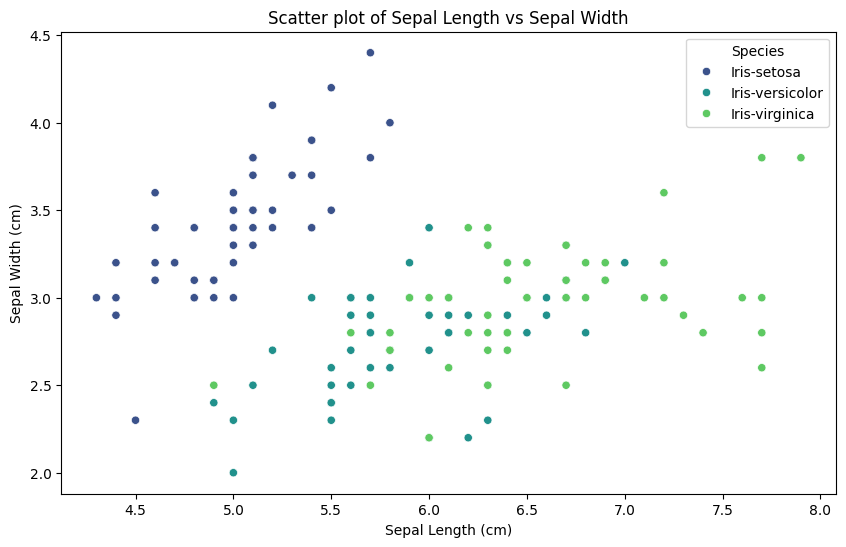

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='viridis')
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

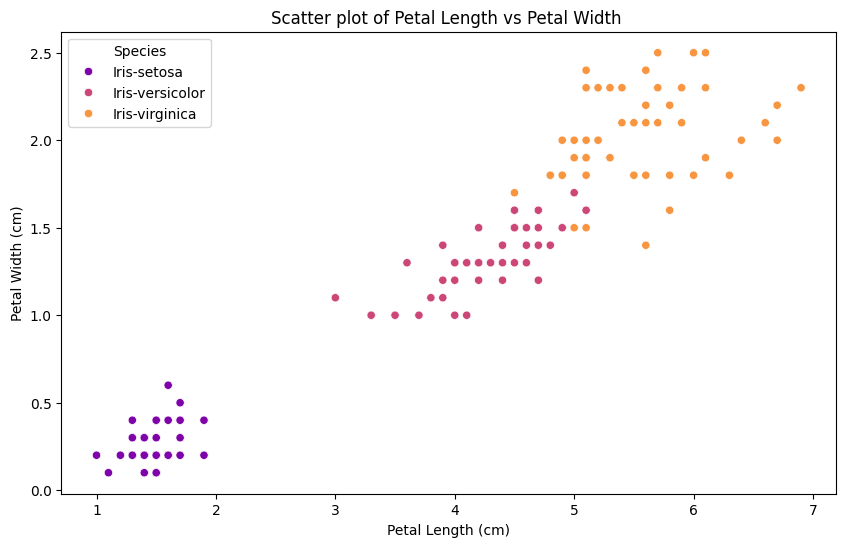

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species',palette='plasma')
plt.title('Scatter plot of Petal Length vs Petal Width ')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

In [11]:
# Correlation matrix
correlation = df.corr()
correlation

<ipython-input-11-712835ba59c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


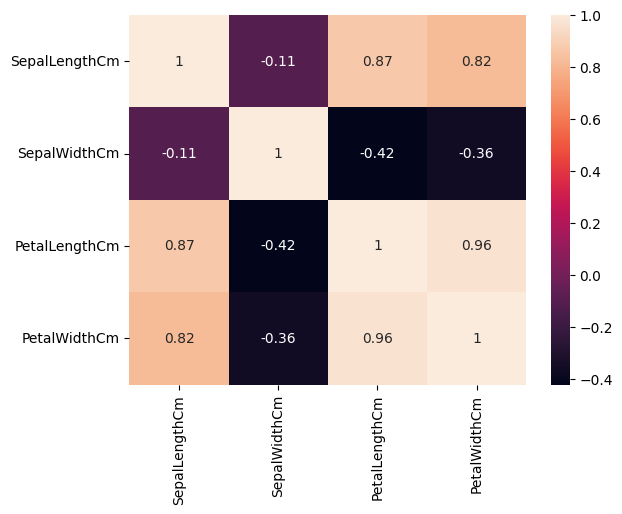

In [12]:
sns.heatmap(correlation,annot=True)
plt.show()

In [13]:
# Separating features and target variable
x= df.iloc[:,:-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
y = df.iloc[:,-1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

###**Train and Test data Separation**


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2

In [16]:
x_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [17]:
y_train

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
      

In [18]:
y_test

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

###**Feature Scaling**
- Scaling the features to have a mean of 0 and a standard deviation of 1

In [19]:
scalar = StandardScaler()
scalar.fit(x_train)
x_train= scalar.transform(x_train)
x_test = scalar.transform(x_test)

###**Model Creation, Prediction and Performance Evaluation**


####**K-Nearest Neighbors**

K-Nearest Neighbors (KNN) is a simple yet powerful algorithm used in machine learning for classification and regression tasks. It works on the principle of finding the K nearest data points in the feature space and making predictions based on the majority class or the average of the K nearest neighbors. KNN is particularly suitable for applications where the decision boundary is irregular or difficult to define mathematically. Its simplicity and effectiveness make it a popular choice for various predictive modeling tasks, including healthcare diagnostics like diabetes prediction. With proper tuning and feature engineering, KNN can provide accurate and reliable predictions, making it a valuable tool in the arsenal of machine learning practitioners.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [22]:
y_predict_knn = knn.predict(x_test)

In [23]:
cm_knn = confusion_matrix(y_test,y_predict_knn)

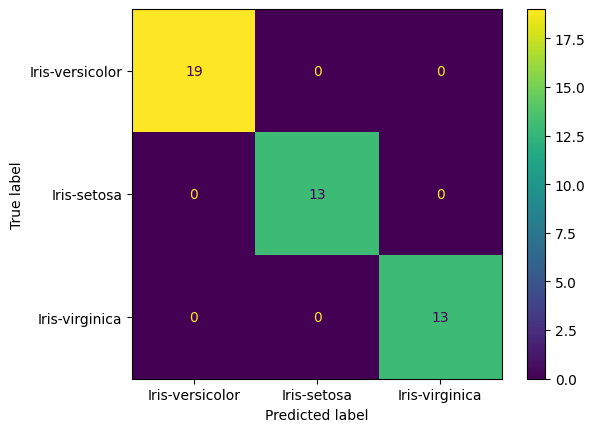

In [24]:
label=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
cmd_knn = ConfusionMatrixDisplay(cm_knn,display_labels=label)
cmd_knn.plot()

In [25]:
ac_score_knn = accuracy_score(y_test,y_predict_knn)*100
print(f"Accuracy score: {ac_score_knn:.2f}")

Accuracy score: 100.00


In [26]:
report_knn = pd.DataFrame(classification_report(y_test,y_predict_knn,output_dict=True)).T
report_knn

,precision,recall,f1-score,support
Iris-setosa,1.0,1.0,1.0,19.0
Iris-versicolor,1.0,1.0,1.0,13.0
Iris-virginica,1.0,1.0,1.0,13.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,45.0
weighted avg,1.0,1.0,1.0,45.0


####**Naive Bayes**

Naive Bayes, a powerful and efficient probabilistic classification method based on Bayes' Theorem, is widely used in machine learning for diverse applications such as text classification, medical diagnosis, and customer segmentation.Naive Bayes calculates the probability of a hypothesis given observed evidence, assuming feature independence. During training, it estimates class priors and conditional feature probabilities. For prediction, it computes posterior probabilities and selects the class with the highest probability.Despite its simplicity, Naive Bayes excels in various scenarios, offering a balance of effectiveness and efficiency in classification tasks.

**GaussianNB**

Gaussian Naive Bayes (NB) is a simple yet effective probabilistic classifier based on Bayes' theorem with the assumption of independence between features. It's particularly suited for classification tasks with continuous or real-valued features, assuming that each feature follows a Gaussian distribution. Despite its simplicity, Gaussian NB performs well in many practical applications and is computationally efficient.

In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [28]:
nb.fit(x_train,y_train)

GaussianNB()

In [29]:
y_predict_nb = nb.predict(x_test)

In [30]:
cm_nb = confusion_matrix(y_test,y_predict_nb)
print("Confuion Matrix:")
print("--------------\n")
print(cm_nb)

Confuion Matrix:
--------------

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


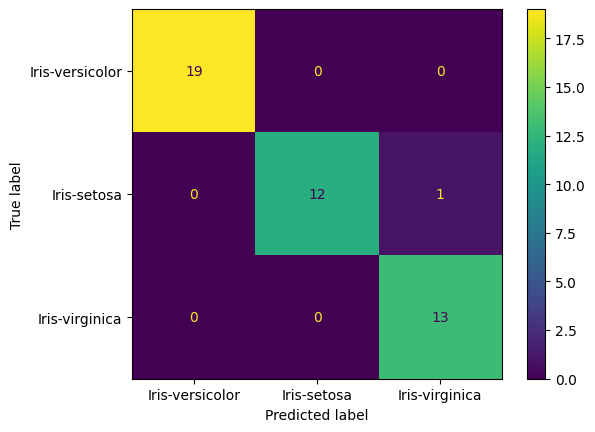

In [31]:
label=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
cmd_nb = ConfusionMatrixDisplay(cm_nb,display_labels=label)
cmd_nb.plot()

In [32]:
ac_score_nb = accuracy_score(y_test,y_predict_nb)*100
print(f"Accuracy Score: {ac_score_nb:.2f}")

Accuracy Score: 97.78


In [33]:
report_nb = pd.DataFrame(classification_report(y_test,y_predict_nb,output_dict=True)).T
report_nb

,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,19.000000
Iris-versicolor,1.000000,0.923077,0.960000,13.000000
Iris-virginica,0.928571,1.000000,0.962963,13.000000
accuracy,0.977778,0.977778,0.977778,0.977778
macro avg,0.976190,0.974359,0.974321,45.000000
weighted avg,0.979365,0.977778,0.977745,45.000000


####**Support Vector Machine**

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates different classes in the feature space. SVM aims to maximize the margin between classes, making it robust to outliers and capable of handling high-dimensional data efficiently. With its versatility and effectiveness, SVM has become a popular choice in various domains, including image classification, text classification, and bioinformatics.

**Support Vector Classifier**

Support Vector Classifier (SVC) is a powerful supervised learning algorithm used for classification tasks. It works by finding the hyperplane that best separates different classes in the feature space while maximizing the margin between them. SVC is effective for handling both binary and multiclass classification problems and is known for its ability to handle high-dimensional data efficiently.

In [34]:
from sklearn.svm import SVC
svm = SVC()

In [35]:
svm.fit(x_train,y_train)

SVC()

In [36]:
y_predict_svm = svm.predict(x_test)

In [37]:
cm_svm = confusion_matrix(y_test,y_predict_svm)
print("Confuion Matrix:")
print("--------------\n")
print(cm_svm)

Confuion Matrix:
--------------

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


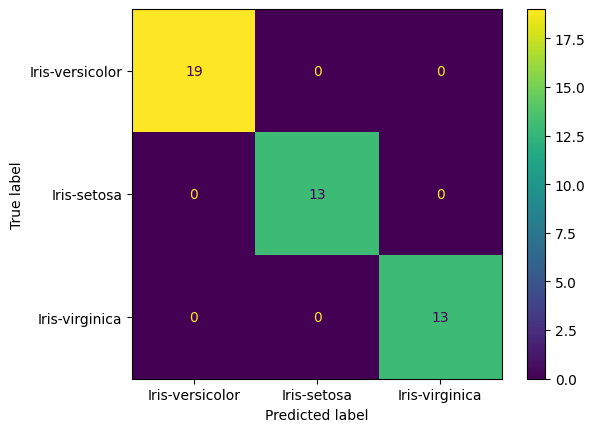

In [38]:
label=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
cmd_svm = ConfusionMatrixDisplay(cm_svm,display_labels=label)
cmd_svm.plot()

In [39]:
ac_score_svm = accuracy_score(y_test,y_predict_svm)*100
print(f"Accuracy_score: {ac_score_svm:.2f}")

Accuracy_score: 100.00


In [40]:
report_svm = pd.DataFrame(classification_report(y_test,y_predict_svm,output_dict=True)).T
report_svm

,precision,recall,f1-score,support
Iris-setosa,1.0,1.0,1.0,19.0
Iris-versicolor,1.0,1.0,1.0,13.0
Iris-virginica,1.0,1.0,1.0,13.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,45.0
weighted avg,1.0,1.0,1.0,45.0


####**Decision Tree**

A Decision Tree algorithm is a simple yet powerful tool in machine learning for classification and regression tasks. It recursively splits the dataset based on attributes to make decisions. While easy to interpret, Decision Trees can overfit and may require techniques like pruning or ensemble methods for better performance. They find applications in various fields such as healthcare diagnosis, credit risk assessment, fraud detection, and customer churn prediction.

**Decison Tree Classifier**

Decision Tree classifiers are versatile tools for decision-making in machine learning. They segment data into subsets based on attributes, enabling straightforward interpretation. Despite their simplicity, they're prone to overfitting and are utilized in various domains like healthcare, finance, and marketing for tasks such as diagnosis, risk assessment, and customer segmentation.

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [42]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_predict_dt = dt.predict(x_test)

In [44]:
cm_dt = confusion_matrix(y_test,y_predict_dt)
print("Confuion Matrix:")
print("--------------\n")
print(cm_dt)

Confuion Matrix:
--------------

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


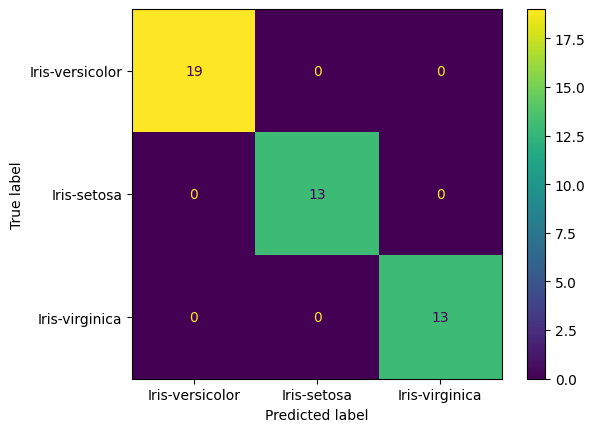

In [45]:
label=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
cmd_dt = ConfusionMatrixDisplay(cm_dt,display_labels=label)
cmd_dt.plot()

In [46]:
ac_score_dt = accuracy_score(y_test,y_predict_dt)*100
print(f"Accuracy Score: {ac_score_dt:.2f}")

Accuracy Score: 100.00


In [47]:
report_dt = pd.DataFrame(classification_report(y_test,y_predict_dt,output_dict=True)).T
report_dt

,precision,recall,f1-score,support
Iris-setosa,1.0,1.0,1.0,19.0
Iris-versicolor,1.0,1.0,1.0,13.0
Iris-virginica,1.0,1.0,1.0,13.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,45.0
weighted avg,1.0,1.0,1.0,45.0


####**Random Forest**

Random Forest is a popular ensemble learning technique that combines multiple decision trees to improve predictive accuracy and reduce overfitting. It constructs a multitude of decision trees during training and outputs the mode of the classes (for classification) or the average prediction (for regression) of the individual trees. Random Forests are widely used due to their robustness, scalability, and effectiveness across various domains such as finance, healthcare, and recommendation systems.

**The Random Forest Classifier**

The Random Forest Classifier is an ensemble learning method based on decision trees. It constructs a multitude of decision trees during training and outputs the mode of the classes for classification tasks. It's highly effective in handling complex datasets, reducing overfitting, and providing robust predictions. Random Forest classifiers find applications in various fields such as image classification, fraud detection, and bioinformatics.

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)

In [49]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_predict_rf = rf.predict(x_test)

In [51]:
cm_rf = confusion_matrix(y_test,y_predict_rf)
print("Confuion Matrix:")
print("--------------\n")
print(cm_rf)

Confuion Matrix:
--------------

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


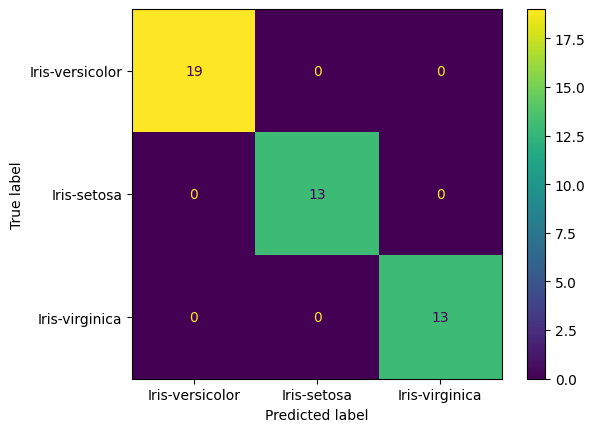

In [52]:
label=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
cmd_rf = ConfusionMatrixDisplay(cm_rf,display_labels=label)
cmd_rf.plot()

In [53]:
ac_score_rf = accuracy_score(y_test,y_predict_rf)*100
print(f"Accuracy Score: {ac_score_rf:.2f}")

Accuracy Score: 100.00


In [54]:
report_rf = pd.DataFrame(classification_report(y_test,y_predict_rf,output_dict=True)).T
report_rf

,precision,recall,f1-score,support
Iris-setosa,1.0,1.0,1.0,19.0
Iris-versicolor,1.0,1.0,1.0,13.0
Iris-virginica,1.0,1.0,1.0,13.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,45.0
weighted avg,1.0,1.0,1.0,45.0


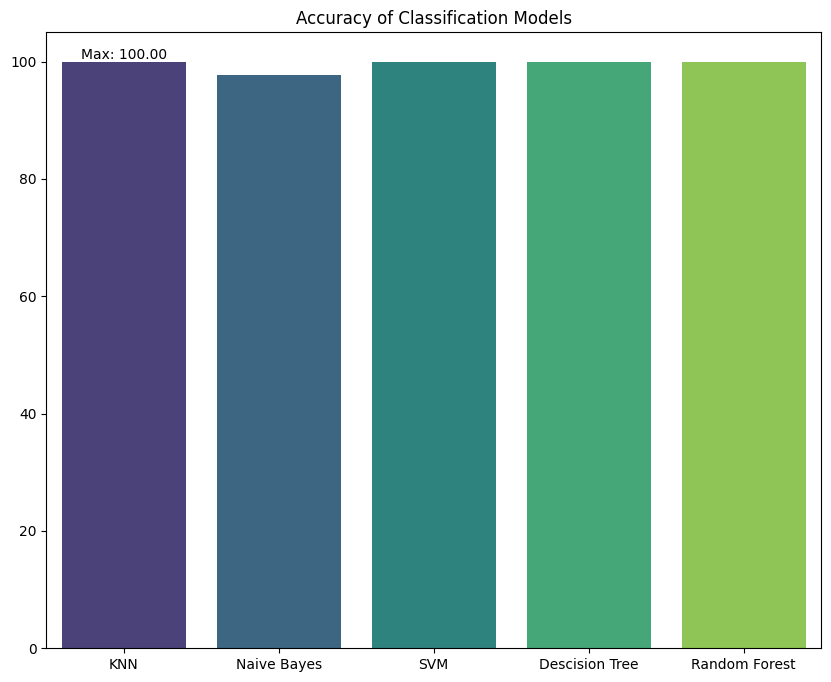

In [55]:
acc_score= [ac_score_knn,ac_score_nb,ac_score_svm,ac_score_dt,ac_score_rf]
acc_score_max =max(acc_score)
max_index = acc_score.index(acc_score_max)

models = ['KNN','Naive Bayes','SVM','Descision Tree','Random Forest']
plt.figure(figsize=(10,8))
plt.title('Accuracy of Classification Models')
sns.barplot(x=models,y=acc_score,palette='viridis',legend=False,hue=models)
plt.text(max_index,acc_score_max,f'Max: {acc_score_max:.2f}',ha='center',va='bottom')
plt.show()

K-Nearest Neighbor, SVM, Decision Tree, and Random Forest achieved a 100% accuracy score.